# **Importing Libraries**

In [27]:
!pip install -q --upgrade fastcore
!pip install -q --upgrade fastai
!pip install -q nbdev

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as PImage
from fastai.vision.all import *
from fastai.vision import *

from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)



In [31]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CGIAR/Train.csv')
img_path = '/content/drive/My Drive/Colab Notebooks/CGIAR/Images'


In [32]:
image_count = np.zeros((7,1))
for i in range(7):
  image_count[i] = np.sum(df['growth_stage'] == i+1)
print(image_count)

[[3057.]
 [1389.]
 [ 689.]
 [1712.]
 [1092.]
 [ 421.]
 [2335.]]


In [33]:
quality_count = np.zeros((2,1))
for i in range(2):
  quality_count[i] = np.sum(df['label_quality'] == i+1)
print(quality_count)

[[7839.]
 [2856.]]


In [34]:
b = 0
for i in range(7):
  a = np.sum((df['growth_stage'] == i+1) & (df['label_quality'] == 2))
  #print(f'For {i+1}: {a}')
  b += a
print(f'Sum: {b}')

Sum: 2856


In [35]:
# is_im = []
# for im_id in train.UID:
#   im = PImage.open(f'{img_path}/{im_id}.jpeg')
#   lis_im.append(np.asarray(im))l


In [36]:
# tsne = TSNE()
# X_embedded = tsne.fit_transform(np.array(lis_im[0]))
# sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

In [37]:

# plt.figure()
# fig, axs = plt.subplots(4, 2, figsize=(12, 16))
# num = 7
# for i, ax in enumerate(axs.flatten()):
#   if num in df['growth_stage'].unique(): # If i+1 is a valid growth stage
#     im_id = df.loc[(df.growth_stage == num) & (df.label_quality==2)].sample()['UID'].values[0]
#     print(im_id) 
#     im = PImage.open(f'{img_path}/{im_id}.jpeg')
#     ax.imshow(im)
#     ax.set_title( f'Growth Stage {num}')


In [38]:

train = df.loc[(df.label_quality==2)]
# train_1 = df.loc[(df.label_quality==1) & (df.growth_stage==1)].sample(n=50, random_state=42)
# train_6 = df.loc[(df.label_quality==1) & (df.growth_stage==6)].sample(n=50, random_state=42)

# train = train.append([train_1, train_6], ignore_index=True).sample(frac=1)

In [ ]:

# n = 0.1
# lis = []
# for uid in (train['UID']):
#   img = img_path + '/' + uid + '.jpeg'
#   a = PImage.open(img)
#   b = np.asarray(a)
#   count = 0
#   for i in range(len(b)):
#     for j in range(len(b[0])):
#       if (b[i][j][0] == 0) & (b[i][j][1] == 0) & (b[i][j][2] == 0):
#         count += 1
#   if count > n*len(b)*len(b[0]):
#     lis.append(uid)

# df1 = pd.DataFrame(lis, columns=['UID'])
# df1.to_csv('/content/drive/My Drive/Colab Notebooks/CGIAR/list.csv', index=False)




In [ ]:
#files = get_image_files(img_path)
#print(len(files))

In [ ]:
# df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CGIAR/list.csv')

# train = train.set_index('UID')
# train = train.drop(list(df1.UID), axis=0)
# train = train.reset_index()

In [ ]:
train

,UID,growth_stage,label_quality
0,nwuCTQKz,4,2
7,sYLqmiXV,3,2
10,rDP2EuQN,7,2
17,dMTbnE8V,2,2
21,HQWkZRNB,2,2
...,...,...,...
10669,vFCworLP,3,2
10676,0JgdizyW,4,2
10678,UCYrpl2M,4,2
10685,qkFZePCc,3,2


In [ ]:
doc(setup_aug_tfms)

In [ ]:
tfms = setup_aug_tfms([Rotate(max_deg=15, p=0.7),
            RandomResizedCrop(p=1., size=(150,200)),
            Brightness(max_lighting=0.2, p=0.75),
            CropPad(size=(150,200)),
            Zoom(min_zoom=1.0, max_zoom=1.1, p=0.5),
            Warp(magnitude=0.2, p=0.2)])



In [ ]:
dls = ImageDataLoaders.from_df(train, path='/content/drive/My Drive/Colab Notebooks/CGIAR/Images', suff='.jpeg',
                               label_col='growth_stage', item_tfms=Resize((150,200)), valid_pct=0.2, seed=42,
                               y_block=RegressionBlock, bs=64, batch_tfms=tfms)

fastai.data.core.DataLoaders

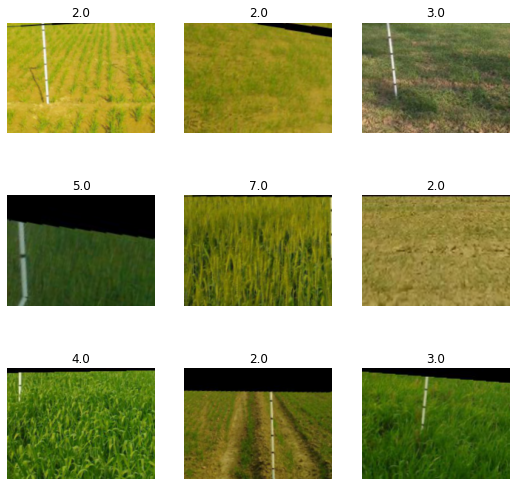

In [ ]:
dls.show_batch()
type(dls)

In [ ]:
doc(cnn_learner)

In [ ]:
learn0 = cnn_learner(dls, resnet50(pretrained=True), metrics=rmse, pretrained=True)
learn0.to_fp16()
learn0.fine_tune(epochs=75) 

In [ ]:
learn1 = cnn_learner(dls, resnet50(pretrained=False), metrics=rmse, pretrained=True)
learn1.to_fp16()
learn1.fine_tune(epochs=75) 

learn2 = cnn_learner(dls, densenet161(pretrained=False), metrics=rmse, pretrained=True)
learn2.to_fp16()
learn2.fine_tune(epochs=75) 

learn3 = cnn_learner(dls, vgg19_bn(pretrained=False), metrics=rmse, pretrained=True)
learn3.to_fp16()
learn3.fine_tune(epochs=75) 


In [ ]:
ss = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CGIAR/SampleSubmission.csv')
tdl = learn0.dls.test_dl(ss) # Make test dataloader
preds = learn0.tta(dl=tdl) # Test Time Augmentation

In [ ]:
ss['growth_stage'] = preds[0].numpy() # This time our outputs are in the format we want, so this part is much easier
ss.to_csv('/content/drive/My Drive/Colab Notebooks/CGIAR/sub_check.csv', index=False)

In [ ]:
learn0.export('/content/drive/My Drive/Colab Notebooks/CGIAR/model_resnet50_pre.pkl')

In [ ]:
learn0.summary()

Sequential (Input shape: ['64 x 3 x 150 x 200'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 150 x 200  1,792      True      
________________________________________________________________
BatchNorm2d          64 x 64 x 150 x 200  128        True      
________________________________________________________________
ReLU                 64 x 64 x 150 x 200  0          False     
________________________________________________________________
Conv2d               64 x 64 x 150 x 200  36,928     True      
________________________________________________________________
BatchNorm2d          64 x 64 x 150 x 200  128        True      
________________________________________________________________
ReLU                 64 x 64 x 150 x 200  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 75 x 100   0          False     
_________________________________________________

In [42]:
# learn1 = load_learner('/content/drive/My Drive/Colab Notebooks/CGIAR/model_resnet50_h.pkl')

In [41]:
# learn1.summary()

ValueError: ignored